In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math
import random
import scipy
import scipy.linalg
with open('mat1-2.txt', 'r') as f:
    m = [[float(num) for num in line.split(',')] for line in f]
def randomList(numElements):
    myList = []
    for i in range(0,numElements):
        myList.append(random.uniform(-1,1))
    return myList
b=[]
for i in range(0,101):
    b.append(randomList(101))
errorsNormal=[]
errorsQR=[]
conditionNumbers=[]
for k in range(40,66):
    akList=[]
    averageNormalError=0
    averageQRError=0
    for i in range(0,len(m)):
        akList.append([])
        for j in range(0,k):
            akList[i].append(m[i][j])
    ak=np.array(akList)
    print("Size of A_%d: %d x %d"%(k,len(ak),len(ak[0])))
    print("Rank of A_%d: %d"%(k,np.linalg.matrix_rank(ak)))
    print("Condition Number of A_%d: %d"%(k,np.linalg.cond(ak)))
    print()
    for i in range(0,100):
        trueSol=np.array(np.linalg.lstsq(ak,b[i]))[0]
        #Cholesky raised an error for me so I used LU
        lower=scipy.linalg.lu(np.matmul(ak.T,ak))[1]
        upper=scipy.linalg.lu(np.matmul(ak.T,ak))[2]
        n=len(np.matmul(ak.T,ak))
        thisB=np.matmul(ak.T,b[i])
        y=np.linalg.solve(lower,thisB)
        normalSol=np.linalg.solve(upper,y)
        q,r=np.linalg.qr(ak)
        projection=np.dot(q.T,b[i])
        qrSol=np.linalg.solve(r,projection)
        normalError=np.linalg.norm(normalSol-trueSol)/np.linalg.norm(trueSol)
        qrError=np.linalg.norm(qrSol-trueSol)/np.linalg.norm(trueSol)
        averageNormalError+=normalError
        averageQRError+=qrError
    averageNormalError/=100
    averageQRError/=100
    errorsNormal.append(averageNormalError)
    errorsQR.append(averageQRError)
    conditionNumbers.append(np.linalg.cond(ak))
ks=[]
for i in range(40,66):
    ks.append(i)

Size of A_40: 101 x 40
Rank of A_40: 40
Condition Number of A_40: 74



/tmp/ipykernel_191/3401615674.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  trueSol=np.array(np.linalg.lstsq(ak,b[i]))[0]
/tmp/ipykernel_191/3401615674.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trueSol=np.array(np.linalg.lstsq(ak,b[i]))[0]


Size of A_41: 101 x 41
Rank of A_41: 41
Condition Number of A_41: 103

Size of A_42: 101 x 42
Rank of A_42: 42
Condition Number of A_42: 152

Size of A_43: 101 x 43
Rank of A_43: 43
Condition Number of A_43: 217

Size of A_44: 101 x 44
Rank of A_44: 44
Condition Number of A_44: 328

Size of A_45: 101 x 45
Rank of A_45: 45
Condition Number of A_45: 483

Size of A_46: 101 x 46
Rank of A_46: 46
Condition Number of A_46: 753

Size of A_47: 101 x 47
Rank of A_47: 47
Condition Number of A_47: 1140

Size of A_48: 101 x 48
Rank of A_48: 48
Condition Number of A_48: 1826

Size of A_49: 101 x 49
Rank of A_49: 49
Condition Number of A_49: 2846

Size of A_50: 101 x 50
Rank of A_50: 50
Condition Number of A_50: 4695

Size of A_51: 101 x 51
Rank of A_51: 51
Condition Number of A_51: 7530

Size of A_52: 101 x 52
Rank of A_52: 52
Condition Number of A_52: 12789

Size of A_53: 101 x 53
Rank of A_53: 53
Condition Number of A_53: 21122

Size of A_54: 101 x 54
Rank of A_54: 54
Condition Number of A_54: 36

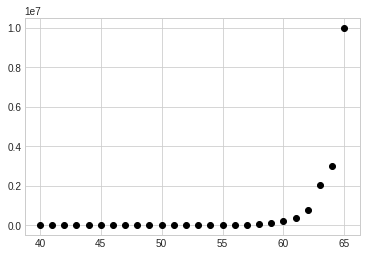

In [49]:
plt.plot(ks, errorsNormal, 'o', color='black');

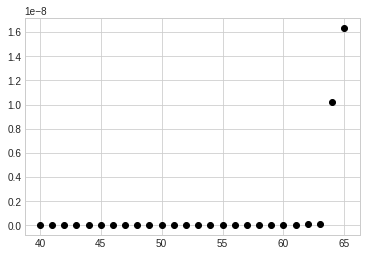

In [45]:
plt.plot(ks, errorsQR, 'o', color='black');

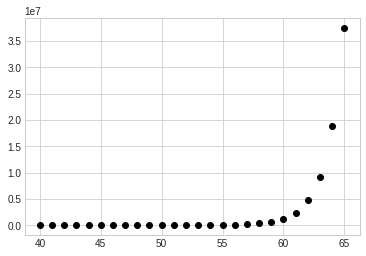

In [50]:
plt.plot(ks, conditionNumbers, 'o', color='black');